<a href="https://colab.research.google.com/github/james-d-kaye-92/data-science-obesity/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/borakol1/obesity-prediction

---
Imports
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
url = 'https://raw.githubusercontent.com/james-d-kaye-92/data-science-obesity/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'
df1 = pd.read_csv(url)

---
Exploratory Data Analysis
---

1) check for missing data (null values) (df.isnull().sum())

2) check min, max, mean valus for each variable (df.describe().T)

3) check for duplicates (df.duplicated().sum() and df = df.drop_duplicates())

4) check variable values for cetegorical variables (df.info() and df["Obesity_level"].value_counts())

In [ ]:
df1 = df1.rename(columns={'NObeyesdad':'Obesity_level'})

In [ ]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df1.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [ ]:
df1.duplicated().sum()

24

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

Data Columns Details :

Gender: Gender

Age: Age

Height : in metres

Weight : in kgs

family_history : Has a family member suffered or suffers from overweight?

FAVC : Do you eat high caloric food frequently?

FCVC : Do you usually eat vegetables in your meals?

NCP : How many main meals do you have daily?

CAEC : Do you eat any food between meals?
SMOKE : Do you smoke?

CH2O : How much water do you drink daily?

SCC : Do you monitor the calories you eat daily?

FAF: How often do you have physical activity?

TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?

CALC : How often do you drink alcohol?
MTRANS : Which transportation do you usually use?

Obesity_level (Target Column) : Obesity level

In [ ]:
df1['CALC'].value_counts()

,count
CALC,
Sometimes,1380
no,636
Frequently,70
Always,1


In [ ]:
df1["MTRANS"].value_counts()

,count
MTRANS,
Public_Transportation,1558
Automobile,456
Walking,55
Motorbike,11
Bike,7


In [ ]:
df1["CAEC"].value_counts()

,count
CAEC,
Sometimes,1761
Frequently,236
Always,53
no,37


In [ ]:
df1["Obesity_level"].value_counts()

,count
Obesity_level,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


---
Data Visualisation
---

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

Text(0.5, 1.0, 'Gender counts')

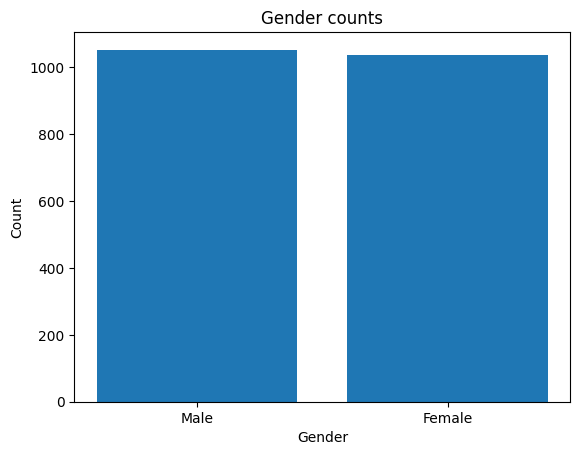

In [ ]:
gender = df1['Gender'].value_counts()

plt.figure()
plt.bar(gender.index, gender.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender counts")

Text(0.5, 1.0, 'Alcohol consumption')

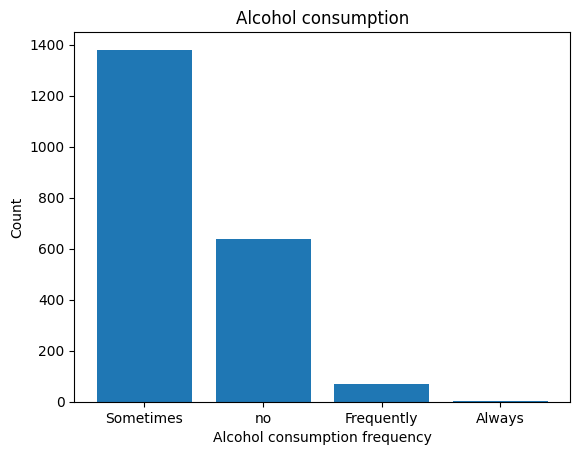

In [ ]:
alcohol_consumption = df1["CALC"].value_counts()

plt.bar(alcohol_consumption.index, alcohol_consumption.values)
plt.xlabel("Alcohol consumption frequency")
plt.ylabel("Count")
plt.title("Alcohol consumption")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Public_Transportation'),
  Text(1, 0, 'Automobile'),
  Text(2, 0, 'Walking'),
  Text(3, 0, 'Motorbike'),
  Text(4, 0, 'Bike')])

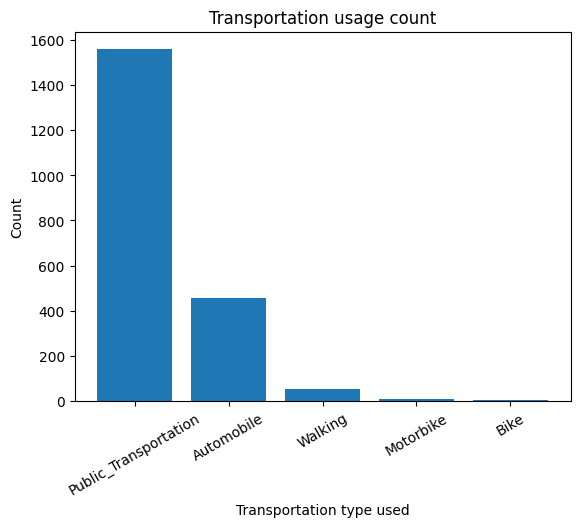

In [ ]:
transportation_type_usage = df1["MTRANS"].value_counts()

plt.bar(transportation_type_usage.index, transportation_type_usage.values)
plt.xlabel("Transportation type used")
plt.ylabel("Count")
plt.title("Transportation usage count")
plt.xticks(rotation=30)

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

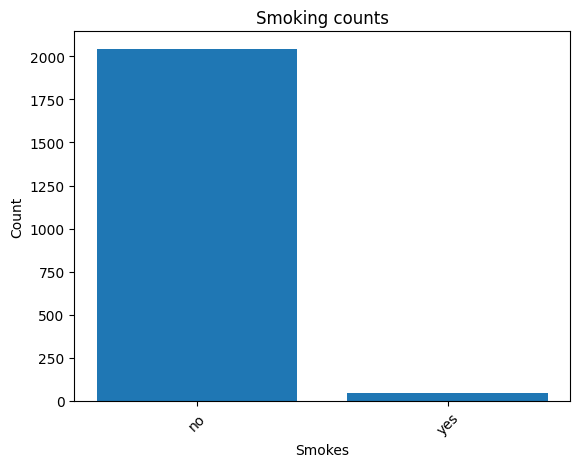

In [ ]:
smoking = df1['SMOKE'].value_counts()

plt.figure()
plt.bar(smoking.index, smoking.values)
plt.xlabel("Smokes")
plt.ylabel("Count")
plt.title("Smoking counts")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Obesity_Type_I'),
  Text(1, 0, 'Obesity_Type_III'),
  Text(2, 0, 'Obesity_Type_II'),
  Text(3, 0, 'Overweight_Level_II'),
  Text(4, 0, 'Normal_Weight'),
  Text(5, 0, 'Overweight_Level_I'),
  Text(6, 0, 'Insufficient_Weight')])

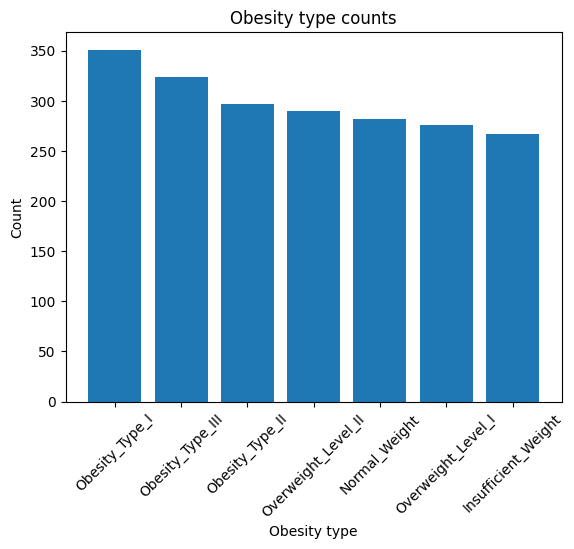

In [ ]:
obesity_type = df1['Obesity_level'].value_counts()

plt.figure()
plt.bar(obesity_type.index, obesity_type.values)
plt.xlabel("Obesity type")
plt.ylabel("Count")
plt.title("Obesity type counts")
plt.xticks(rotation=45)

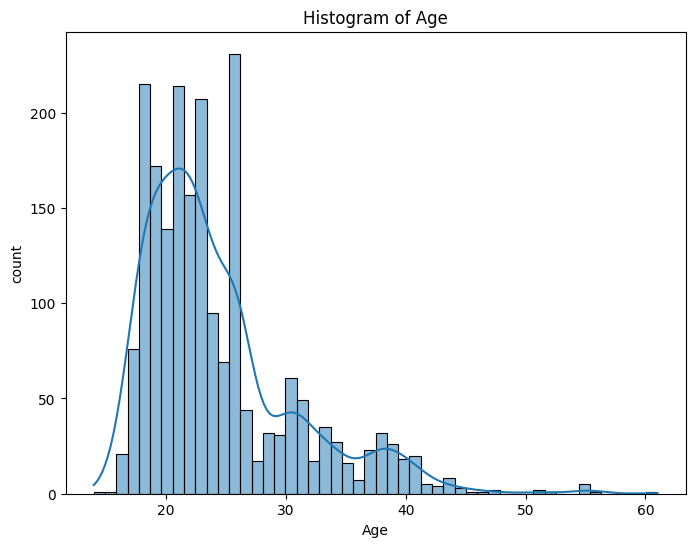

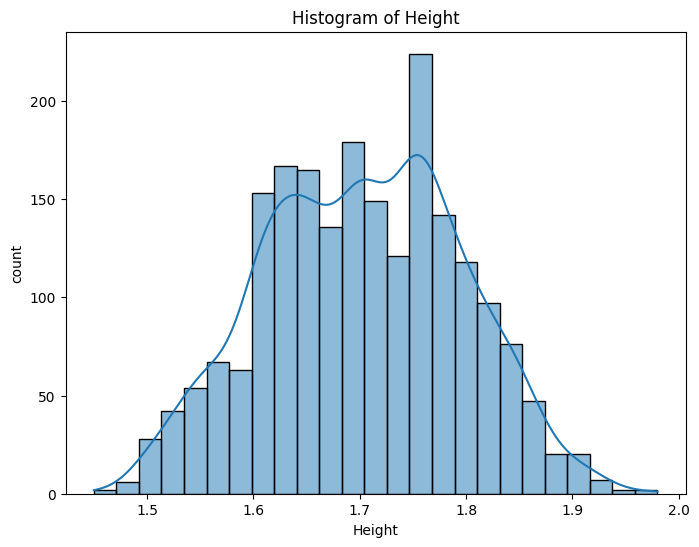

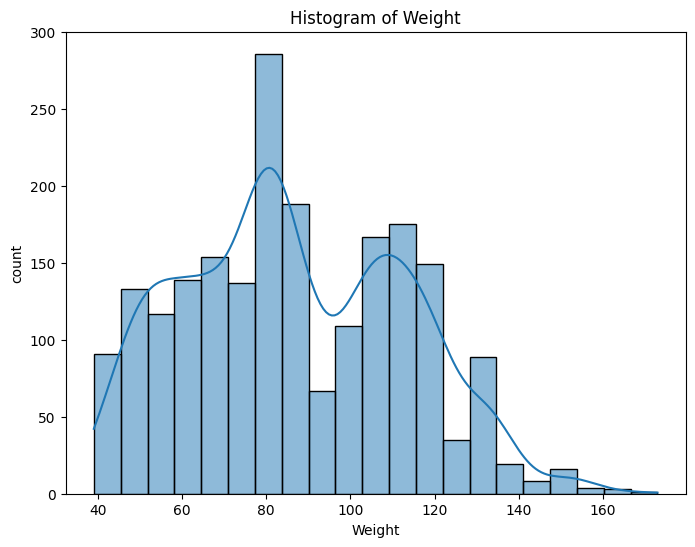

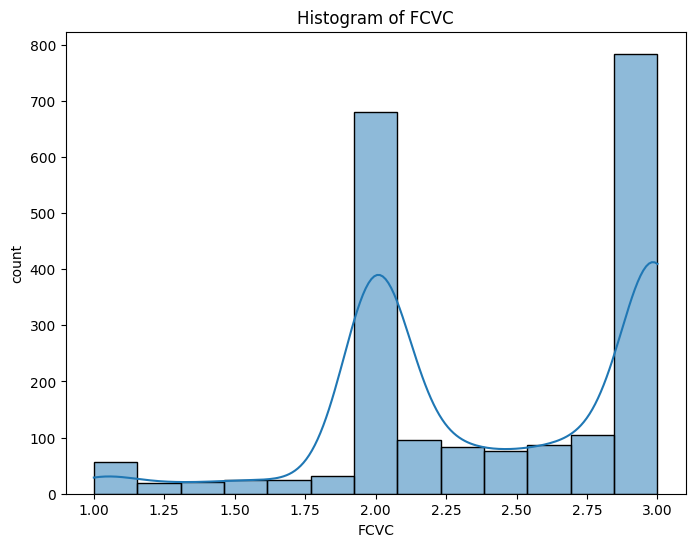

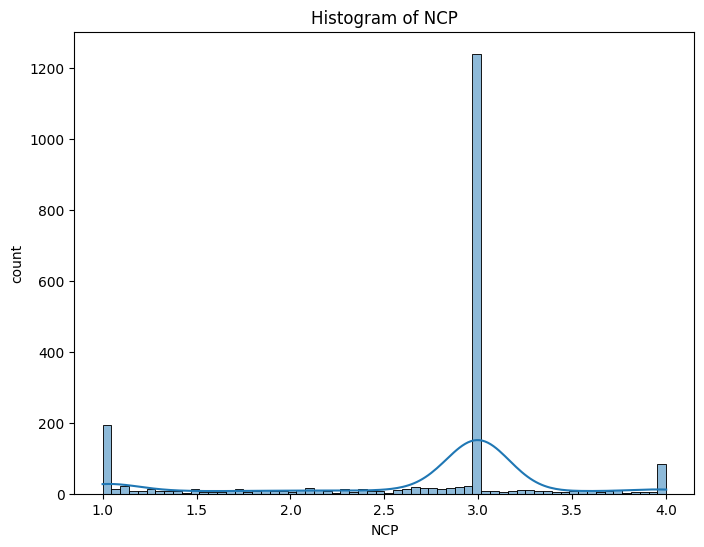

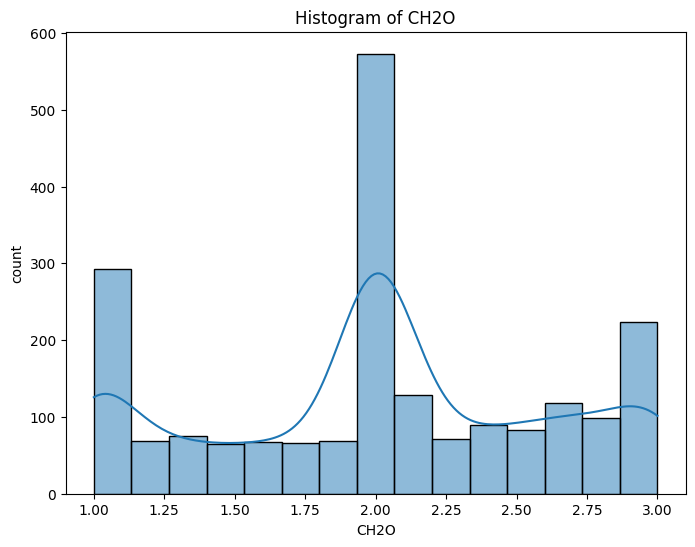

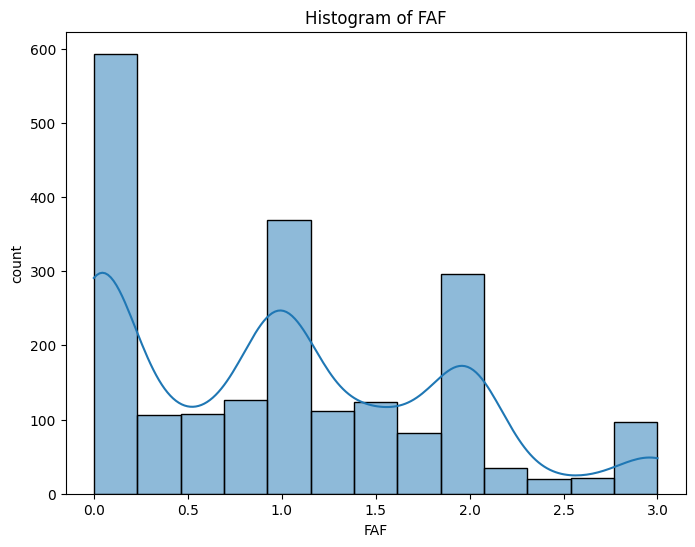

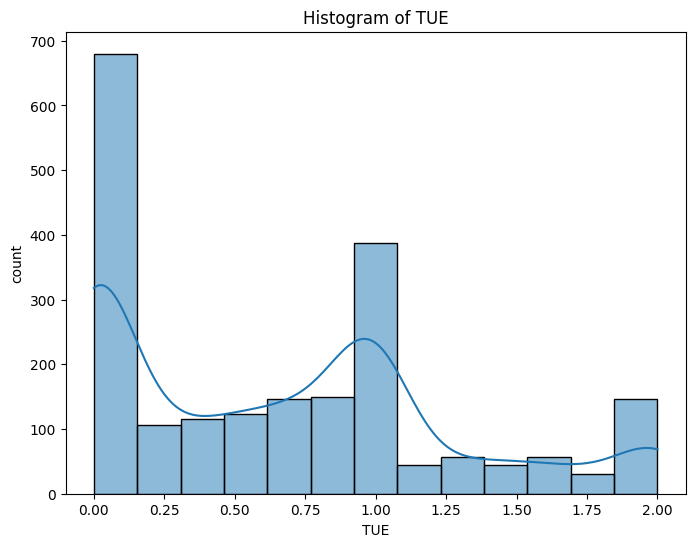

In [ ]:
numeric_cols = df1.select_dtypes(include = ["float64"])

for col in numeric_cols.columns :
    plt.figure(figsize=(8,6))
    sns.histplot(data=df1[col] , kde = True)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(f"Histogram of {col}")

---
Machine Learning Preparation
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [ ]:
X = df1.drop(['Obesity_level'], axis=1)
y = df1['Obesity_level']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
Decision Tree
---

In [ ]:
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=30)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=30)

In [ ]:
y_pred_dec_tree = dec_tree.predict(X_test)

In [ ]:
accuracy_dec_tree = accuracy_score(y_pred_dec_tree, y_test)

In [ ]:
print(accuracy_dec_tree)

0.8373205741626795


In [ ]:
print(classification_report(y_pred_dec_tree, y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        49
      Normal_Weight       0.59      0.94      0.72        32
     Obesity_Type_I       0.89      0.77      0.83        88
    Obesity_Type_II       0.97      1.00      0.99        70
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.62      0.73      0.67        44
Overweight_Level_II       0.70      0.55      0.62        69

           accuracy                           0.84       418
          macro avg       0.82      0.85      0.83       418
       weighted avg       0.85      0.84      0.84       418



---
Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_clf = rf_clf.predict(X_test)

In [ ]:
rf_clf_accuracy = accuracy_score(y_pred_rf_clf, y_test)

In [ ]:
print(rf_clf_accuracy)

0.9449760765550239


In [ ]:
print(classification_report(y_pred_rf_clf, y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       0.91      1.00      0.96        43
      Normal_Weight       1.00      0.76      0.86        67
     Obesity_Type_I       0.96      0.97      0.97        75
    Obesity_Type_II       0.99      1.00      0.99        71
   Obesity_Type_III       1.00      1.00      1.00        66
 Overweight_Level_I       0.81      0.95      0.88        44
Overweight_Level_II       0.91      0.94      0.92        52

           accuracy                           0.94       418
          macro avg       0.94      0.95      0.94       418
       weighted avg       0.95      0.94      0.94       418



---
Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_reg = LogisticRegression()

In [ ]:
lg_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lg_reg = lg_reg.predict(X_test)

In [ ]:
lg_reg_accuracy = accuracy_score(y_pred_lg_reg,y_test)
print(f"lg_reg accuracy : {lg_reg_accuracy}")

print(classification_report(y_pred_lg_reg , y_test))

lg_reg accuracy : 0.6602870813397129
                     precision    recall  f1-score   support

Insufficient_Weight       0.72      0.79      0.76        43
      Normal_Weight       0.57      0.54      0.55        54
     Obesity_Type_I       0.42      0.52      0.47        61
    Obesity_Type_II       0.93      0.77      0.84        87
   Obesity_Type_III       1.00      0.82      0.90        80
 Overweight_Level_I       0.54      0.60      0.57        47
Overweight_Level_II       0.37      0.43      0.40        46

           accuracy                           0.66       418
          macro avg       0.65      0.64      0.64       418
       weighted avg       0.70      0.66      0.67       418



---
PCA
---